# [Importing Data in Python (Part 2)](https://www.datacamp.com/courses/importing-data-in-python-part-2)

## Importing Flat Files From the Web
- import and locally save datasets from the web
- load datasets into pandas DataFrames
- make HTTP requests (GET requests)
- scrape web data such as HTML
- parse HTML into useful data (BeautifulSoup)
- Use the urllib and requests packages

### The urllib package
- provides interface for fetching data across the web
- `urlopen()` - accepts URLs instead of file names

```python
from urllib.request import urlretrieve
url = 'http://some.url.com/folder/folder2/some-file.csv'
urlretrieve(url, 'some-file.csv')
```

In [1]:
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

 #### [Dataframe.ix Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ix.html)

In [3]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xl.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xl['1700'].head())

odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


## HTTP requests to import files from the web
- URL - Uniform/Universal Resource Locator
- References to web resources
- Ingredients:
    - Protocol identifier - http:
    - Resource name - datacamp.com
- These specify web addresses uniquely
- HTTP - hypertext Transfer Protocol
- Going to a website = sending HTTP request
    - GET request
- `urlretrieve()` performs a GET request but also saves the relevant data locally.

```python
from urllib.request import urlopen, Request
url = "https://www.wikipedia.org/"
request = Request(url)
response = urlopen(request)
html = response.read()
response.close()
```

### Requests Package

```python
import requests
url = "https://www.wikipedia.org/"
r = requests.get(url)
text = r.text
```

In [4]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


In [5]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()


b'\n<!DOCTYPE HTML>\n<html lang="" >\n    <head>\n        <meta charset="UTF-8">\n        <meta content="text/html; charset=utf-8" http-equiv="Content-Type">\n        <title>Welcome \xc2\xb7 Authoring Content for DataCamp</title>\n        <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n        <meta name="description" content="">\n        <meta name="generator" content="GitBook 3.2.3">\n        \n        \n        \n    \n    <link rel="stylesheet" href="gitbook/style.css">\n\n    \n            \n                \n                <link rel="stylesheet" href="gitbook/gitbook-plugin-bootstrap-callout/plugin.css">\n                \n            \n                \n                <link rel="stylesheet" href="gitbook/gitbook-plugin-expandable-chapters/expandable-chapters.css">\n                \n            \n                \n                <link rel="stylesheet" href="gitbook/gitbook-plugin-advanced-emoji/emoji-website.css">\n                \n            \n                \n  

In [6]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)


<!DOCTYPE HTML>
<html lang="" >
    <head>
        <meta charset="UTF-8">
        <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
        <title>Welcome · Authoring Content for DataCamp</title>
        <meta http-equiv="X-UA-Compatible" content="IE=edge" />
        <meta name="description" content="">
        <meta name="generator" content="GitBook 3.2.3">
        
        
        
    
    <link rel="stylesheet" href="gitbook/style.css">

    
            
                
                <link rel="stylesheet" href="gitbook/gitbook-plugin-bootstrap-callout/plugin.css">
                
            
                
                <link rel="stylesheet" href="gitbook/gitbook-plugin-expandable-chapters/expandable-chapters.css">
                
            
                
                <link rel="stylesheet" href="gitbook/gitbook-plugin-advanced-emoji/emoji-website.css">
                
            
                
                <link rel="stylesheet" hre

## Beautiful Soup
- HTML scraping tasks
- Soup - refers to tag soup which is structurally or syntaxically incorrect HTML code

```python
from bs4 import BeautifulSoup
import requests
url = 'https://www.crummy.com/software/BeautifulSoup/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
```

### Many additional methods

```python
print(soup.title)

print(soup.get_text())

for link in soup.find_all('a'):
    print(link.get('href'))
```

In [8]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, "lxml")

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
    Who
I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Publications.html">
    publications list
   </a>
   , a
   <a href="bio.html">
    brief bio
   </a>
   , assor

In [10]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, "lxml")

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.text

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page
"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.  I
also have
a G+
profile.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead ref

In [12]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, "lxml")

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
https://plus.google.com/u/0/115212051037621986145/posts
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## APIs
- Application Programming Interface
- Protocols and routines
- Building and interacting with software applications

## JSONs
- Standard for moving data between APIs
- JavaScript Object Notation
- Real-time server-to-browser communication
- Douglas Crockford

```python
import json
with open('snakes.json', 'r') as json_file:
    json_data = json.load(json_file)
type(json_data)
# output: dict

for key, value in json_data.items():
    print(key + ':', value)
```

- JSONs consist of key-value pairs.
- JSONs are human-readable.
- The JSON file format arose out of a growing need for real-time server-to-browser communication.
- The function `json.load()` will load the JSON into Python as a `dictionary`.

[interacting-with-apis-to-import-data-from-the-web Example 3](https://campus.datacamp.com/courses/importing-data-in-python-part-2/interacting-with-apis-to-import-data-from-the-web-2?ex=3)

```python
# Load JSON: json_data
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])
```

[interacting-with-apis-to-import-data-from-the-web Example 4](https://campus.datacamp.com/courses/importing-data-in-python-part-2/interacting-with-apis-to-import-data-from-the-web-2?ex=4)

```python
In [1]: import json
... with open("a_movie.json") as json_file:
...     json_data = json.load(json_file)

In [2]: json_data['Title']
Out[2]: 'The Social Network'

In [3]: json_data['Year']
Out[3]: '2010'
```

## Connecting to an API in Python

```python
import request
url = 'http://www.ombapi.com/?t=hackers'
r = requests.get(url)
json_data = r.json()
for key, value in json_data.items():
    print(key + ':', value)
```

- http - making an HTTP request
- www.omdbapi.com - querying the OMDB API
- ?t=hackers
    - Query string
    - Parts of URLs that do not fit within the conventional hierarchial parse structure. 
    - The part that follows the ? is the query we are passing to the OMDB API
    - "t=hackers" Return data for a movie with title (t) 'Hackers'
- An API is a set of protocols and routines for building and interacting with software applications.
- API is an acronym and is short for Application Program interface.
- It is common to pull data from APIs in the JSON file format.
- An API is a bunch of code that allows two software programs to communicate with each other.

In [13]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=ff21610b&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"546,709","imdbID":"tt1285016","Type":"movie","DVD":"1

In [14]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=ff21610b&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  546,709
imdbID:  tt1285016
Type:  movie
DVD:  11 Jan 2011
BoxOffice:  $96,40

In [15]:
# Import package
import requests

# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>
<p>A savoury dish of Italian origin, <b>pizza</b>—a term  first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania—consists of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature in a traditionally wood-fired oven. In formal settings, like a restaurant, pizza is  eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.   
</p><p>Popular in many countries, pizza is a common fast food item in Europe and North America, available at any pizzeria (a restaurant specializing in pizza) or other restaurant offering Mediterranean cuisine, which usually offer pizza delivery.   Many companies sell ready-baked frozen pizzas to be reheated in an ordinary home oven. 
</p><

## [Generate Twitter Developer Account for API Access](https://developer.twitter.com)

## Using Tweepy: Authentication handler

```python
import tweepy, json

access_token = "..."
access_token_secret = "..."
consumer_key = "..."
consumer_secret = "..."

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create a stream listener

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")
        
    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\n')
        tweet_list.append(status)
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

# Create Streaming object and authenticate
l = MyStremListener()
stream = tweepy.Stream(auth, l)

# This line filters Twitter Streams to capture data by keywords
stream.filter(track=['apples', 'oranges'])
```

In [1]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

## A [Tweepy](https://github.com/tweepy/tweepy/tree/v3.6.0) [Capstone Project](https://www.anaconda.com/blog/developer-blog/galvanize-capstone-series-geolocation-twitter-users/) that utilizes ML and API integration.

The following code is supplied by DataCamp [HERE](https://gist.github.com/hugobowne/18f1c0c0709ed1a52dc5bcd462ac69f4)

In [2]:
# Generate a listener class
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [3]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)


# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

401
401
401
401
401
401


KeyboardInterrupt: 

In [4]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

IndexError: list index out of range

In [5]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

Empty DataFrame
Columns: [text, lang]
Index: []


In [6]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [7]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

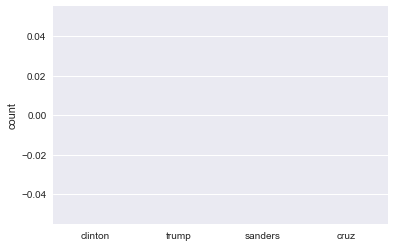

In [9]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()

In [5]:
import requests
r = requests.get('https://api.coindesk.com/v1/bpi/currentprice.json')
print('The current rate of BitCoin is: $' + r.json()['bpi']['USD']['rate'])

The current rate of BitCoin is: $6,319.3775
